In [85]:

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, HTML
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/suicide-rates-overview-1985-to-2016/master.csv


# **Reading Files**

In [86]:
df = pd.read_csv("/kaggle/input/suicide-rates-overview-1985-to-2016/master.csv")

# **Data Exploration**

In [87]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [88]:
df.shape

(27820, 12)

In [89]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [90]:
df.describe(include= "O") #describe for categorical data

,country,sex,age,country-year,gdp_for_year ($),generation
count,27820,27820,27820,27820,27820,27820
unique,101,2,6,2321,2321,6
top,Mauritius,male,15-24 years,Albania1987,"2,156,624,900",Generation X
freq,382,13910,4642,12,12,6408


In [91]:
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

Country-year is a mix between two columns we already have , and HDI for year has too many nulls , so lets drop them


In [92]:
df.drop(['HDI for year','country-year'],axis=1,inplace = True)

In [93]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


# **Data Analysis**

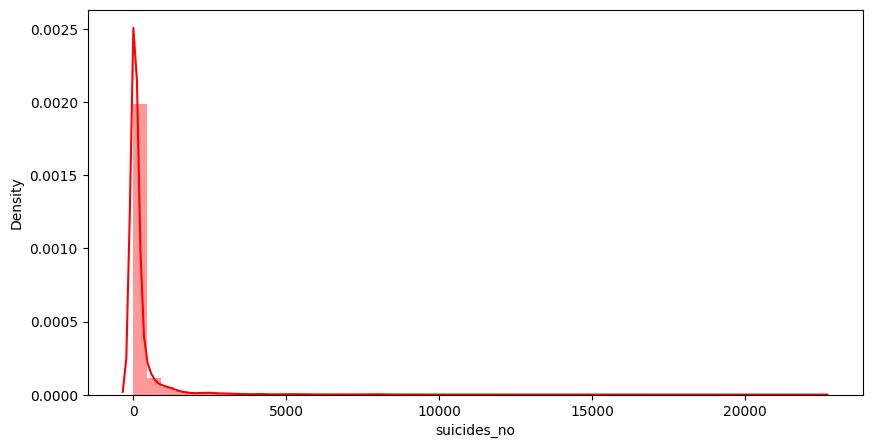

In [94]:
#distribution of suicide no
plt.figure(figsize=(10,5))
sns.distplot(df['suicides_no'],color="r")
plt.show()

In [95]:
df['country'].unique()
#all countries we have

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [96]:
#total suicide in each country
country_suicides = df.groupby('country')['suicides_no'].sum()
pd.set_option('display.max_rows', None)
print(country_suicides)

country
Albania                            1970
Antigua and Barbuda                  11
Argentina                         82219
Armenia                            1905
Aruba                               101
Australia                         70111
Austria                           50073
Azerbaijan                         1656
Bahamas                              93
Bahrain                             463
Barbados                            177
Belarus                           59892
Belgium                           62761
Belize                              348
Bosnia and Herzegovina              318
Brazil                           226613
Bulgaria                          36388
Cabo Verde                           42
Canada                           107561
Chile                             40895
Colombia                          53080
Costa Rica                         6792
Croatia                           18429
Cuba                              41418
Cyprus                          

**- Top 10 countries in suicide no** 

In [97]:
top_10_suicides = country_suicides.sort_values(ascending=False).head(10)
print(top_10_suicides)

country
Russian Federation    1209742
United States         1034013
Japan                  806902
France                 329127
Ukraine                319950
Germany                291262
Republic of Korea      261730
Brazil                 226613
Poland                 139098
United Kingdom         136805
Name: suicides_no, dtype: int64


In [116]:
top_suicides = {
    'Country': ['Russian Federation', 'United States', 'Japan', 'France', 'Ukraine', 'Germany', 'Republic of Korea', 'Brazil', 'Poland', 'United Kingdom'],
    'Suicides Number': [1209742, 1034013, 806902, 329127, 319950, 291262, 261730, 226613, 139098, 136805]
}

top_df = pd.DataFrame(top_suicides)

styled_df = top_df.style.bar(subset=['Suicides Number'], color='#d65f5f', vmin=0, vmax=max(top_df['Suicides Number']))

display(styled_df)

,Country,Suicides Number
0,Russian Federation,1209742
1,United States,1034013
2,Japan,806902
3,France,329127
4,Ukraine,319950
5,Germany,291262
6,Republic of Korea,261730
7,Brazil,226613
8,Poland,139098
9,United Kingdom,136805


**- Bottom 10 countries in suicide no** 

In [99]:
bottom_10_suicides = country_suicides.sort_values(ascending=True).head(10)
print(bottom_10_suicides)

country
Dominica                  0
Saint Kitts and Nevis     0
San Marino                4
Antigua and Barbuda      11
Maldives                 20
Macau                    27
Oman                     33
Grenada                  38
Cabo Verde               42
Kiribati                 53
Name: suicides_no, dtype: int64


In [115]:

bottom_10_suicides = {
    'Country': ['Dominica', 'Saint Kitts and Nevis', 'San Marino', 'Antigua and Barbuda', 'Maldives', 'Macau', 'Oman', 'Grenada', 'Cabo Verde', 'Kiribati'],
    'Suicides Number': [0, 0, 4, 11, 20, 27, 33, 38, 42, 53]
}

bottom_df = pd.DataFrame(bottom_10_suicides)

styled_bottom_df = bottom_df.style.bar(subset=['Suicides Number'], color='#5fba7d', vmin=0, vmax=max(bottom_df['Suicides Number']))

display(styled_bottom_df)


,Country,Suicides Number
0,Dominica,0
1,Saint Kitts and Nevis,0
2,San Marino,4
3,Antigua and Barbuda,11
4,Maldives,20
5,Macau,27
6,Oman,33
7,Grenada,38
8,Cabo Verde,42
9,Kiribati,53


**- Suicides depending on sex**

In [101]:
sex_suicides = df.groupby('sex')['suicides_no'].sum()
print(sex_suicides)

sex
female    1559510
male      5188910
Name: suicides_no, dtype: int64


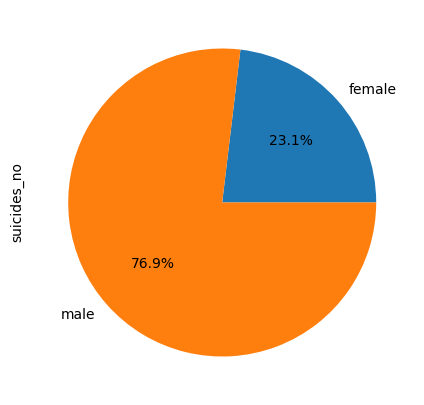

In [102]:
plt.figure(figsize=(10,5))
sex_suicides.plot.pie(autopct="%1.1f%%")
plt.show()

**- Sex suicide depending on age groups**

In [103]:
sex_suicides_ages = df.groupby(['sex', 'age'])['suicides_no'].sum()
sex_suicides_ages

sex     age        
female  15-24 years     175437
        25-34 years     208823
        35-54 years     506233
        5-14 years       16997
        55-74 years     430036
        75+ years       221984
male    15-24 years     633105
        25-34 years     915089
        35-54 years    1945908
        5-14 years       35267
        55-74 years    1228407
        75+ years       431134
Name: suicides_no, dtype: int64

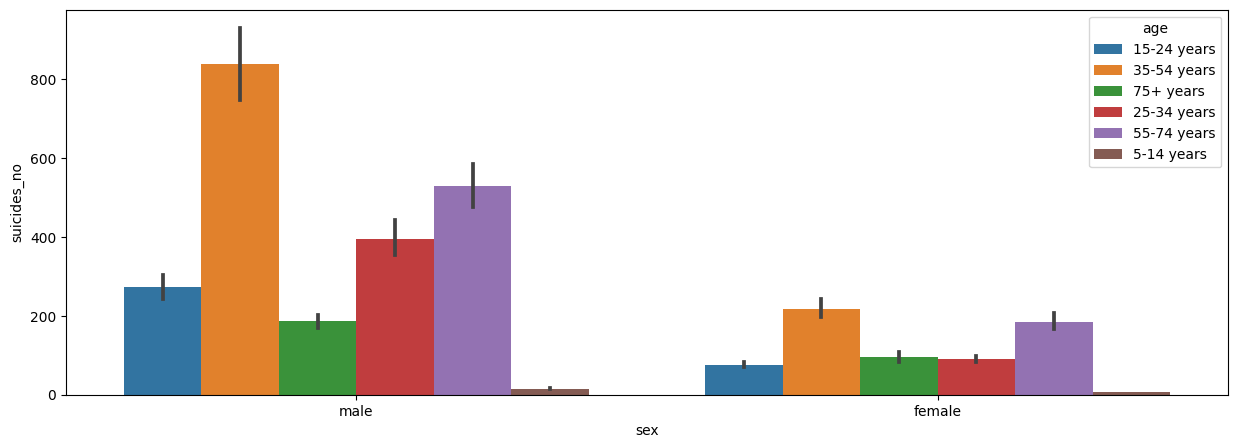

In [124]:
plt.figure(figsize=(15,5))
sns.barplot(x = 'sex', y = 'suicides_no', hue = 'age',data = df)
plt.show()

**- Suicide by year**

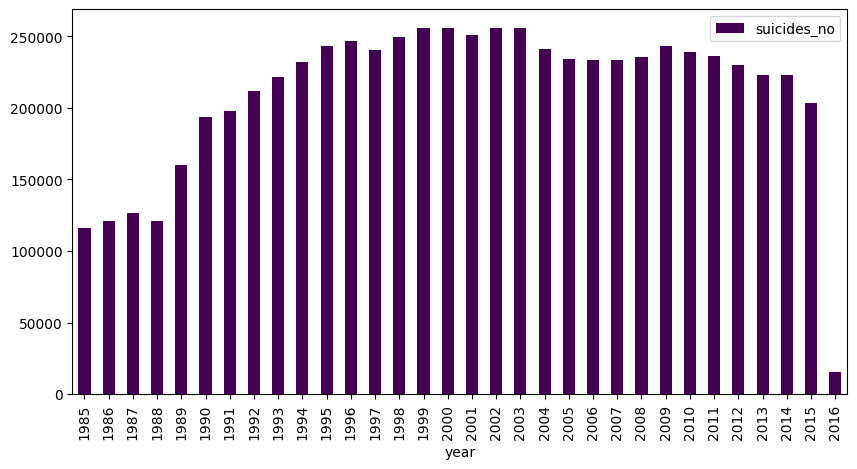

In [105]:
vis = df.groupby(['year'])['suicides_no'].sum()
vis.plot(kind='bar',legend=True,figsize=(10,5),colormap='viridis')
plt.show()

**- But the (suicide no) alone may not be sufficient as it is related to the population size, so we will take (suicides/100k pop) into consideration.**

In [106]:
Suicides100k= df.groupby('country')['suicides/100k pop'].sum()
Suicides100k

country
Albania                           924.76
Antigua and Barbuda               179.14
Argentina                        3894.59
Armenia                           976.21
Aruba                            1596.52
Australia                        4677.41
Austria                          9076.23
Azerbaijan                        356.24
Bahamas                           344.28
Bahrain                           467.24
Barbados                          891.13
Belarus                          7831.13
Belgium                          7900.50
Belize                           2093.49
Bosnia and Herzegovina            110.81
Brazil                           2174.72
Bulgaria                         7016.08
Cabo Verde                        133.84
Canada                           4338.72
Chile                            3921.64
Colombia                         2009.39
Costa Rica                       2553.72
Croatia                          5982.84
Cuba                             6111.95
Cyprus  

**- Top 10 100k/pop suicides (we notice a different sorting)**

In [107]:
top_10_100ksuicides = Suicides100k.sort_values(ascending=False).head(10)
print(top_10_100ksuicides)

country
Russian Federation    11305.13
Lithuania             10588.88
Hungary               10156.07
Kazakhstan             9519.52
Republic of Korea      9350.45
Austria                9076.23
Ukraine                8931.66
Japan                  8025.23
Finland                7924.11
Belgium                7900.50
Name: suicides/100k pop, dtype: float64


In [114]:

data = {
    'country': ['Russian Federation', 'Lithuania', 'Hungary', 'Kazakhstan', 'Republic of Korea', 'Austria', 'Ukraine', 'Japan', 'Finland', 'Belgium'],
    'suicides/100k pop': [11305.13, 10588.88, 10156.07, 9519.52, 9350.45, 9076.23, 8931.66, 8025.23, 7924.11, 7900.50]
}

styled = pd.DataFrame(data)

styleddf = styled.style.background_gradient(cmap='viridis')
display(styleddf)



,country,suicides/100k pop
0,Russian Federation,11305.130000
1,Lithuania,10588.880000
2,Hungary,10156.070000
3,Kazakhstan,9519.520000
4,Republic of Korea,9350.450000
5,Austria,9076.230000
6,Ukraine,8931.660000
7,Japan,8025.230000
8,Finland,7924.110000
9,Belgium,7900.500000


**- bottom 10 100k/pop suicides**

In [109]:
bottom_10_100ksuicides = Suicides100k.sort_values(ascending=True).head(10)
print(bottom_10_100ksuicides)

country
Dominica                    0.00
Saint Kitts and Nevis       0.00
Oman                       26.50
United Arab Emirates       94.89
Jamaica                   106.44
Bosnia and Herzegovina    110.81
Cabo Verde                133.84
San Marino                145.62
Maldives                  164.08
Macau                     171.74
Name: suicides/100k pop, dtype: float64


In [117]:
databottom = {
    'country': ['Dominica', 'Saint Kitts and Nevis', 'Oman', 'United Arab Emirates', 'Jamaica', 'Bosnia and Herzegovina', 'Cabo Verde', 'San Marino', 'Maldives', 'Macau'],
    'suicides/100k pop': [0.00, 0.00, 26.50, 94.89, 106.44, 110.81, 133.84, 145.62, 164.08, 171.74]
}

dfbottom = pd.DataFrame(databottom)

styleddfbottom = dfbottom.style.background_gradient(cmap='viridis', subset=['suicides/100k pop'])

display(styleddfbottom)

,country,suicides/100k pop
0,Dominica,0.000000
1,Saint Kitts and Nevis,0.000000
2,Oman,26.500000
3,United Arab Emirates,94.890000
4,Jamaica,106.440000
5,Bosnia and Herzegovina,110.810000
6,Cabo Verde,133.840000
7,San Marino,145.620000
8,Maldives,164.080000
9,Macau,171.740000


**- 100k/popSuicides depending on sex**

In [118]:
sex_100ksuicides = df.groupby('sex')['suicides/100k pop'].sum()
print(sex_100ksuicides)

sex
female     75014.77
male      281529.06
Name: suicides/100k pop, dtype: float64


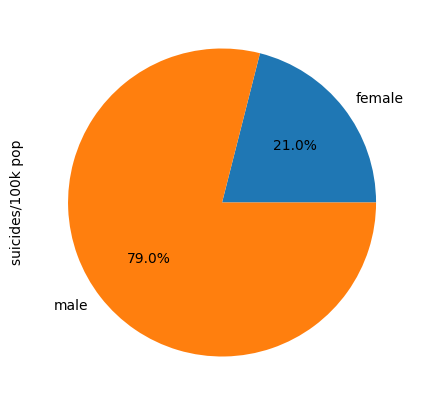

In [119]:
plt.figure(figsize=(10,5))
sex_100ksuicides.plot.pie(autopct="%1.1f%%")
plt.show()

**- Sex suicide100k/pop depending on age groups**

In [120]:
sex_suicides100k_ages = df.groupby(['sex', 'age'])['suicides/100k pop'].sum()
sex_suicides100k_ages

sex     age        
female  15-24 years    10045.33
        25-34 years    10614.42
        35-54 years    13732.15
        5-14 years      1065.49
        55-74 years    16533.52
        75+ years      23023.86
male    15-24 years    31487.36
        25-34 years    45957.10
        35-54 years    55653.87
        5-14 years      1792.90
        55-74 years    58460.68
        75+ years      88177.15
Name: suicides/100k pop, dtype: float64

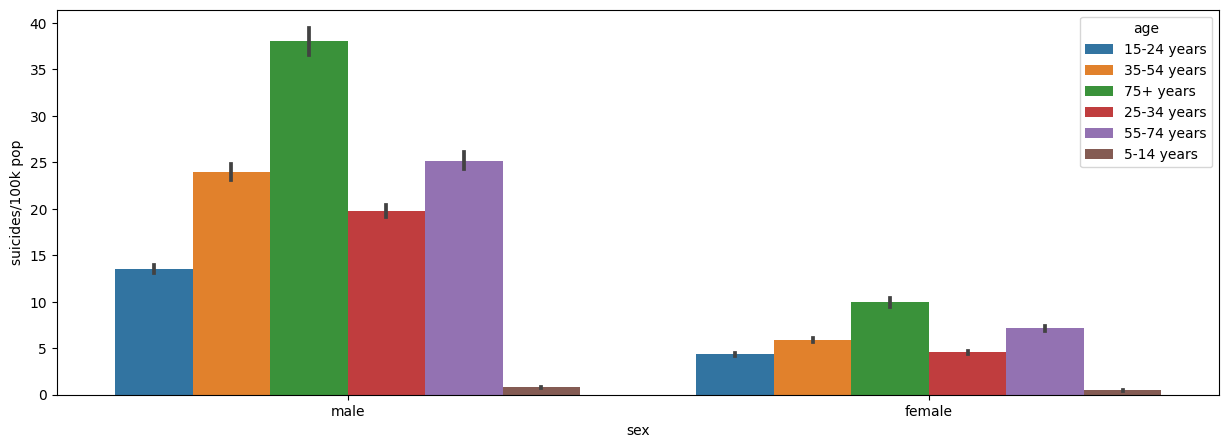

In [123]:
plt.figure(figsize=(15,5))
sns.barplot(x = 'sex', y = 'suicides/100k pop', hue = 'age',data = df)
plt.show()

**- We note that when we took (suicide_no), the category (35-74) was the most suicidal, but when we applied (suicides/100k pop), the +75 category became the most suicidal.**

**- 100k/pop suicide by year**

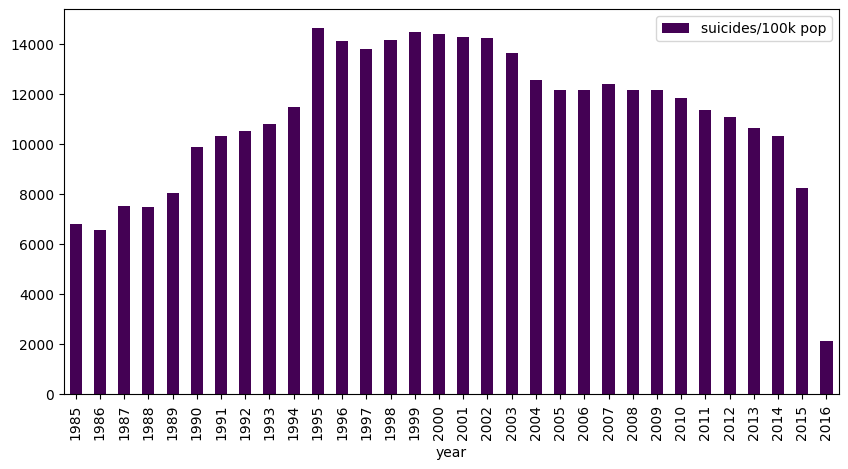

In [125]:
visk = df.groupby(['year'])['suicides/100k pop'].sum()
visk.plot(kind='bar',legend=True,figsize=(10,5),colormap='viridis')
plt.show()

#### Thank You ..